# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.298
[epoch: 0, i:  1499] avg mini-batch loss: 2.287
[epoch: 0, i:  1999] avg mini-batch loss: 2.245
[epoch: 0, i:  2499] avg mini-batch loss: 2.197
[epoch: 0, i:  2999] avg mini-batch loss: 2.090
[epoch: 0, i:  3499] avg mini-batch loss: 2.029
[epoch: 0, i:  3999] avg mini-batch loss: 1.955
[epoch: 0, i:  4499] avg mini-batch loss: 1.925
[epoch: 0, i:  4999] avg mini-batch loss: 1.876
[epoch: 1, i:   499] avg mini-batch loss: 1.832
[epoch: 1, i:   999] avg mini-batch loss: 1.833
[epoch: 1, i:  1499] avg mini-batch loss: 1.789
[epoch: 1, i:  1999] avg mini-batch loss: 1.778
[epoch: 1, i:  2499] avg mini-batch loss: 1.773
[epoch: 1, i:  2999] avg mini-batch loss: 1.670
[epoch: 1, i:  3499] avg mini-batch loss: 1.610
[epoch: 1, i:  3999] avg mini-batch loss: 1.589
[epoch: 1, i:  4499] avg mini-batch loss: 1.550
[epoch: 1, i:  4999] avg mini-batc

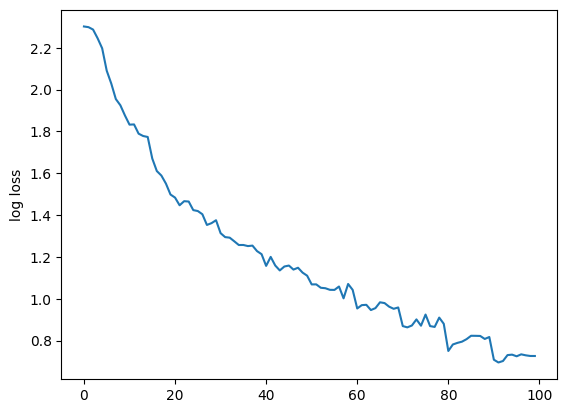

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Baseline accuracy of the convolutional model is 65.52 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:

encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.068048
Train Epoch: 2 	Loss: 0.062160
Train Epoch: 3 	Loss: 0.053698
Train Epoch: 4 	Loss: 0.046947
Train Epoch: 5 	Loss: 0.041152
Train Epoch: 6 	Loss: 0.036773
Train Epoch: 7 	Loss: 0.032741
Train Epoch: 8 	Loss: 0.029168
Train Epoch: 9 	Loss: 0.026230
Train Epoch: 10 	Loss: 0.023711
Train Epoch: 11 	Loss: 0.021947
Train Epoch: 12 	Loss: 0.020585
Train Epoch: 13 	Loss: 0.019308
Train Epoch: 14 	Loss: 0.018197
Train Epoch: 15 	Loss: 0.017205
Train Epoch: 16 	Loss: 0.016143
Train Epoch: 17 	Loss: 0.015138
Train Epoch: 18 	Loss: 0.014356
Train Epoch: 19 	Loss: 0.013629
Train Epoch: 20 	Loss: 0.012907


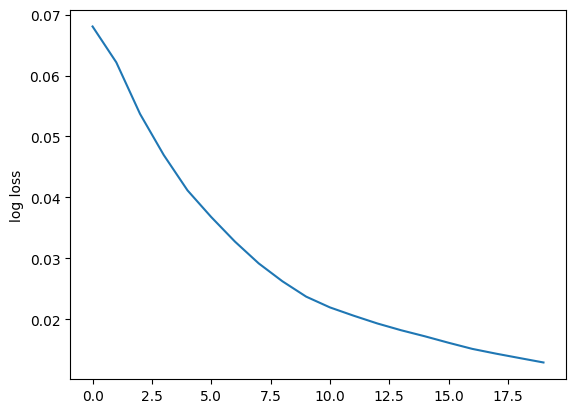

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified


100%|██████████| 10000/10000 [08:47<00:00, 18.95it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified


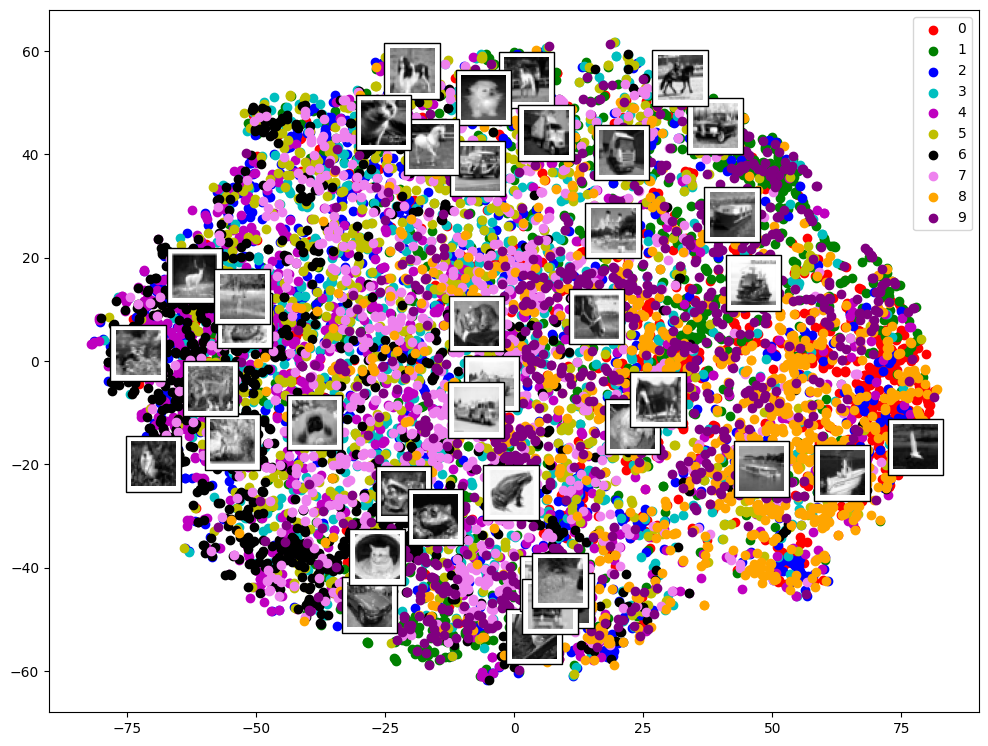

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified


100%|██████████| 50000/50000 [15:39<00:00, 53.21it/s] 


Files already downloaded and verified


100%|██████████| 10000/10000 [01:42<00:00, 97.10it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.5301

### Multiple Runs

In [16]:
# subsample so things run faster
X_train, y_train = encode_data(train=True, subsample = True)
X_test, y_test = encode_data(train=False, subsample = True)

Files already downloaded and verified


100%|██████████| 5000/5000 [00:52<00:00, 94.37it/s]


Files already downloaded and verified


100%|██████████| 1000/1000 [00:10<00:00, 99.33it/s]


In [17]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [18]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=True)
    conv_errors.append(test_conv(ConvNet, subsample=True)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.293
[epoch: 3, i:   499] avg mini-batch loss: 2.260
[epoch: 4, i:   499] avg mini-batch loss: 2.149
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.303
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.297
[epoch: 3, i:   499] avg mini-batch loss: 2.287
[epoch: 4, i:   499] avg mini-batch loss: 2.258
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 1, i:   499] avg mini-batch loss: 2.300
[epoch: 2, i:   499] avg mini-batch loss: 2.294
[epoch: 3, i:   499] avg mini-batch loss: 2.280
[epoch: 4, i:   499] avg mini-batch loss: 2.222
Files already downloaded and verified


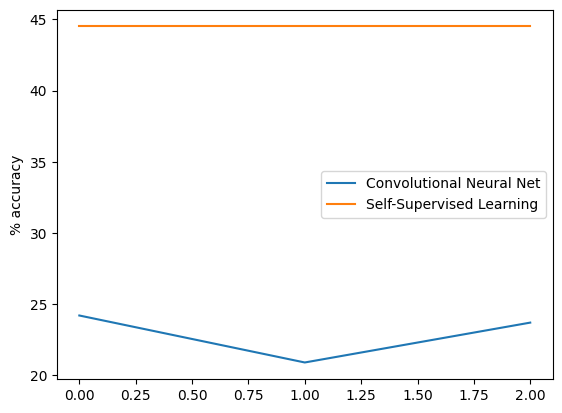

In [19]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [20]:
conv_errors

[24.2, 20.9, 23.7]

In [21]:
svm_errors

[0.445, 0.445, 0.445]

In [22]:
conv_errors

[24.2, 20.9, 23.7]